### 1. Considerando o conjunto de dados contendo informações sobre fogo em florestas (forestfires.csv em anexo): e calcule as seguintes estatísticas sobre os dados de cada atributo:

A) Calcule, para cada coluna desse conjunto de dados, as estatísticas univariadas pertinentes dentre frequências, moda, média, mediana, desvio-padrão, Q1, Q3, obliquidade e curtose.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Carregar o arquivo CSV
df = pd.read_csv("forest_fires/forestfires.csv")

# Calcular estatísticas univariadas para cada coluna
estatisticas = pd.DataFrame(index=df.columns)

estatisticas["Tipo"] = df.dtypes
estatisticas["Moda"] = df.mode().iloc[0]
estatisticas["Média"] = df.select_dtypes(include=[np.number]).mean()
estatisticas["Mediana"] = df.select_dtypes(include=[np.number]).median()
estatisticas["Desvio-Padrão"] = df.select_dtypes(include=[np.number]).std()
estatisticas["Q1"] = df.select_dtypes(include=[np.number]).quantile(0.25)
estatisticas["Q3"] = df.select_dtypes(include=[np.number]).quantile(0.75)
estatisticas["Obliquidade"] = df.select_dtypes(include=[np.number]).apply(skew)
estatisticas["Curtose"] = df.select_dtypes(include=[np.number]).apply(kurtosis)

# Identificar a variável com maior dispersão em torno da média (maior desvio-padrão)
maior_dispersao = estatisticas["Desvio-Padrão"].idxmax()

estatisticas = estatisticas.round(3)
estatisticas, maior_dispersao


(          Tipo   Moda    Média  Mediana  Desvio-Padrão     Q1      Q3  \
 X        int64    4.0    4.669     4.00          2.314    3.0    7.00   
 Y        int64    4.0    4.300     4.00          1.230    4.0    5.00   
 month   object    aug      NaN      NaN            NaN    NaN     NaN   
 day     object    sun      NaN      NaN            NaN    NaN     NaN   
 FFMC   float64   91.6   90.645    91.60          5.520   90.2   92.90   
 DMC    float64   99.0  110.872   108.30         64.046   68.6  142.40   
 DC     float64  745.3  547.940   664.20        248.066  437.7  713.90   
 ISI    float64    9.6    9.022     8.40          4.559    6.5   10.80   
 temp   float64   17.4   18.889    19.30          5.807   15.5   22.80   
 RH       int64   27.0   44.288    42.00         16.317   33.0   53.00   
 wind   float64    2.2    4.018     4.00          1.792    2.7    4.90   
 rain   float64    0.0    0.022     0.00          0.296    0.0    0.00   
 area   float64    0.0   12.847     0.

B) Responda: qual é a variável com maior dispersão em torno de sua média?

In [3]:
# Calcular a matriz de correlação apenas para atributos numéricos
correlacao = df.select_dtypes(include=[np.number]).corr()

# Encontrar o par de atributos com maior correlação absoluta (excluindo diagonal)
correlacao_abs = correlacao.abs()
np.fill_diagonal(correlacao_abs.values, 0)  # Ignorar correlação de um atributo com ele mesmo

max_corr_val = correlacao_abs.max().max()
par_maior_dependencia = correlacao_abs.stack().idxmax()

correlacao.round(3), par_maior_dependencia, max_corr_val


(          X      Y   FFMC    DMC     DC    ISI   temp     RH   wind   rain  \
 X     1.000  0.540 -0.021 -0.048 -0.086  0.006 -0.051  0.085  0.019  0.065   
 Y     0.540  1.000 -0.046  0.008 -0.101 -0.024 -0.024  0.062 -0.020  0.033   
 FFMC -0.021 -0.046  1.000  0.383  0.331  0.532  0.432 -0.301 -0.028  0.057   
 DMC  -0.048  0.008  0.383  1.000  0.682  0.305  0.470  0.074 -0.105  0.075   
 DC   -0.086 -0.101  0.331  0.682  1.000  0.229  0.496 -0.039 -0.203  0.036   
 ISI   0.006 -0.024  0.532  0.305  0.229  1.000  0.394 -0.133  0.107  0.068   
 temp -0.051 -0.024  0.432  0.470  0.496  0.394  1.000 -0.527 -0.227  0.069   
 RH    0.085  0.062 -0.301  0.074 -0.039 -0.133 -0.527  1.000  0.069  0.100   
 wind  0.019 -0.020 -0.028 -0.105 -0.203  0.107 -0.227  0.069  1.000  0.061   
 rain  0.065  0.033  0.057  0.075  0.036  0.068  0.069  0.100  0.061  1.000   
 area  0.063  0.045  0.040  0.073  0.049  0.008  0.098 -0.076  0.012 -0.007   
 
        area  
 X     0.063  
 Y     0.045  
 FFMC

### 2. AGRUPAMENTO DE CLASSES

In [3]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = (
    fetch_ucirepo(id=544)
)

# data (as pandas dataframes) - CRIAR CÓPIAS EXPLÍCITAS
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features.copy()
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets.copy()

# metadata
print(
    estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata
)

# variable information
print(
    estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables
)

# Criar LabelEncoders separados para cada coluna categórica
le_dict = {}
col_cat = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

for column_name in col_cat:
    le = LabelEncoder()
    X[column_name] = le.fit_transform(X[column_name])
    le_dict[column_name] = le  # Armazenar para uso posterior

# Pré-processamento do target 'y'
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y.values.ravel())

knnClassifier = KNeighborsClassifier(metric="minkowski", p=2)
knnClassifier.fit(X, y_encoded)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


A) Quantos atributos são disponibilizados para cada amostra do conjunto de dados

In [8]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# O número de atributos é o número de colunas em X
num_atributos = X.shape[1]

print(f"O conjunto de dados possui {num_atributos} atributos para cada amostra.")

# Você também pode visualizar os primeiros atributos para confirmar:
print("\nPrimeiras 5 linhas dos atributos (X):")
print(X.head())

O conjunto de dados possui 16 atributos para cada amostra.

Primeiras 5 linhas dos atributos (X):
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation

B) Quais são as categorias de classificação

In [9]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# Criar e ajustar o LabelEncoder para 'y'
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y.values.ravel()) # .ravel() para lidar com o formato de y

# Obter as categorias originais usando inverse_transform
categorias_originais = le_y.inverse_transform(np.unique(y_encoded))

print("As categorias de classificação (níveis de obesidade) são:")
for categoria in sorted(categorias_originais): # Ordenar para melhor visualização
    print(f"- {categoria}")

As categorias de classificação (níveis de obesidade) são:
- Insufficient_Weight
- Normal_Weight
- Obesity_Type_I
- Obesity_Type_II
- Obesity_Type_III
- Overweight_Level_I
- Overweight_Level_II


In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes) - CRIAR CÓPIAS EXPLÍCITAS
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features.copy()
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets.copy()

# Pré-processamento dos atributos categóricos
le_X = LabelEncoder()
col_cat = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for column_name in col_cat:
    X[column_name] = le_X.fit_transform(X[column_name])

# Pré-processamento do target 'y'
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y.values.ravel())

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Instanciar e treinar o classificador KNN
knnClassifier = KNeighborsClassifier(metric='minkowski', p=2)
knnClassifier.fit(X_train, y_train)

# Fazer previsões nos dados de TREINAMENTO
y_train_pred = knnClassifier.predict(X_train)

# Calcular a acurácia nos dados de TREINAMENTO
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f"A acurácia do classificador nos dados de treinamento é: {accuracy_train:.4f}")

# Opcional: Calcular acurácia nos dados de TESTE para comparação
y_test_pred = knnClassifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"A acurácia do classificador nos dados de teste é: {accuracy_test:.4f}")

A acurácia do classificador nos dados de treinamento é: 0.9165
A acurácia do classificador nos dados de teste é: 0.8818


D) Qual a acurácia do classificador para os dados de treinamento?

E)Qual é classe predita pelo algoritmo para uma pessoa com as seguintes características...:

In [ ]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Importar para dividir os dados
from sklearn.metrics import accuracy_score # Importar para calcular a acurácia

# 1. Carregar e Pré-processar o Conjunto de Dados (repetição do setup para garantir consistência)
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# Identificar colunas categóricas e numéricas para pré-processamento
col_cat = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
col_num = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] # Adicionado para escalonamento

# Armazenar os LabelEncoders para as colunas categóricas
le_dict = {}
for column_name in col_cat:
    le = LabelEncoder()
    # Fit no LabelEncoder para a coluna do DataFrame X
    X[column_name] = le.fit_transform(X[column_name])
    le_dict[column_name] = le # Armazenar o encoder para usar na nova amostra

# Pré-processamento do target 'y'
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y.values.ravel())

# Escalonar as características numéricas (fundamental para KNN)
scaler = StandardScaler()
X[col_num] = scaler.fit_transform(X[col_num])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Treinar o classificador KNN
knnClassifier = KNeighborsClassifier(metric='minkowski', p=2)
knnClassifier.fit(X_train, y_train)

# 2. Preparar a Nova Amostra para Predição

# Criar um DataFrame com os dados da nova pessoa
# É crucial que as colunas estejam na mesma ordem que o X_train
new_person_data = {
    'Gender': ['Female'],
    'Age': [42.0],
    'Height': [1.75],
    'Weight': [75.0],
    'family_history_with_overweight': ['no'], # 'no' ou 'yes'
    'FAVC': ['yes'], # 'yes' ou 'no'
    'FCVC': [1.0], # 1, 2 ou 3
    'NCP': [3.0], # 1, 2, 3 ou 4
    'CAEC': ['Sometimes'], # 'Sometimes', 'Frequently', 'Always', 'no'
    'SMOKE': ['no'], # 'yes' ou 'no'
    'CH2O': [2.0], # 1, 2 ou 3
    'SCC': ['no'], # 'yes' ou 'no'
    'FAF': [0.0], # 0, 1, 2 ou 3
    'TUE': [0.0], # 0, 1 ou 2
    'CALC': ['Sometimes'], # 'Sometimes', 'Frequently', 'Always', 'no'
    'MTRANS': ['Public_Transportation'] # 'Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'
}
new_person_df = pd.DataFrame(new_person_data)

# Pré-processar a nova amostra usando os LabelEncoders e o StandardScaler treinados
for col_name in col_cat:
    if col_name in new_person_df.columns:
        # Use o encoder treinado para transformar a nova amostra
        new_person_df[col_name] = le_dict[col_name].transform(new_person_df[col_name])

# Escalonar as características numéricas da nova pessoa
new_person_df[col_num] = scaler.transform(new_person_df[col_num])

# Garantir que a ordem das colunas da nova amostra seja a mesma do X_train
# Isso é CRÍTICO para a previsão correta
new_person_processed = new_person_df[X_train.columns]


# 3. Fazer a Predição
predicted_class_encoded = knnClassifier.predict(new_person_processed)

# 4. Inverter a Codificação para Obter a Classe Original
predicted_class_original = le_y.inverse_transform(predicted_class_encoded)

print(f"\nA classe de obesidade predita para a pessoa com as características fornecidas é: **{predicted_class_original[0]}**")

### 4. CLASSIFICADOR BINÁRIO

In [5]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

# 1. Carregar os dados
mushroom = fetch_ucirepo(id=73)
X = mushroom.data.features
y = mushroom.data.targets

# Verificar os nomes das colunas
print("Colunas de X:", X.columns.tolist())
print("Colunas de y:", y.columns.tolist())

# 2. Combinar X e y para garantir o alinhamento
data = pd.concat([X, y], axis=1)

# 3. Pré-processamento
le_dict = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    le_dict[column] = le

# 4. Separar features e target usando o nome correto da coluna
target_column = y.columns[0]  # Pega automaticamente o nome da primeira coluna alvo
X_encoded = data.drop(columns=[target_column])
y_encoded = data[target_column]

# 5. Divisão treino/teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=51
)

# 6. Treinamento do modelo
clf = SGDClassifier(random_state=51)
clf.fit(X_train, y_train)

# 7. Predições e cálculo do F1 Score
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")

Colunas de X: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Colunas de y: ['poisonous']
F1 Score: 0.9211


5) PREDIÇÃO COM REDES NEURAIS ARTIFICIAIS

In [6]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Importar warnings para ignorar avisos de convergência
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


# 1. Carregar os dados
room_occupancy_estimation = fetch_ucirepo(id=864)
X = room_occupancy_estimation.data.features
y = room_occupancy_estimation.data.targets

# Verificar estrutura dos dados
print("Colunas de X:", X.columns.tolist())
print("Colunas de y:", y.columns.tolist())
print("Formato de X:", X.shape)
print("Formato de y:", y.shape)
print("\nPrimeiras linhas de y:")
print(y.head())

# Usar o nome correto da coluna alvo
target_column = y.columns[0]  # Pega automaticamente a primeira coluna
print(f"\nUsando coluna alvo: {target_column}")

# Extrair a série da coluna alvo
y_series = y[target_column]

# Combinar 'Date' e 'Time' em uma única coluna datetime
X['datetime'] = pd.to_datetime(X['Date'] + ' ' + X['Time'], format='%Y/%m/%d %H:%M:%S')

# Extrair componentes temporais úteis
X['year'] = X['datetime'].dt.year
X['month'] = X['datetime'].dt.month
X['day'] = X['datetime'].dt.day
X['dayofweek'] = X['datetime'].dt.dayofweek  # 0=segunda, 6=domingo
X['hour'] = X['datetime'].dt.hour
X['minute'] = X['datetime'].dt.minute
X['is_weekend'] = X['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Remover colunas originais
X = X.drop(columns=['Date', 'Time', 'datetime'])

# 2. Dividir os dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_series, test_size=0.3, random_state=51
)

# 3. Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Criar e treinar a rede neural
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                   max_iter=500, random_state=51)
mlp.fit(X_train_scaled, y_train)

print("Modelo treinado com sucesso!")

Colunas de X: ['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']
Colunas de y: ['Room_Occupancy_Count']
Formato de X: (10129, 18)
Formato de y: (10129, 1)

Primeiras linhas de y:
   Room_Occupancy_Count
0                     1
1                     1
2                     1
3                     1
4                     1

Usando coluna alvo: Room_Occupancy_Count
Modelo treinado com sucesso!


A)

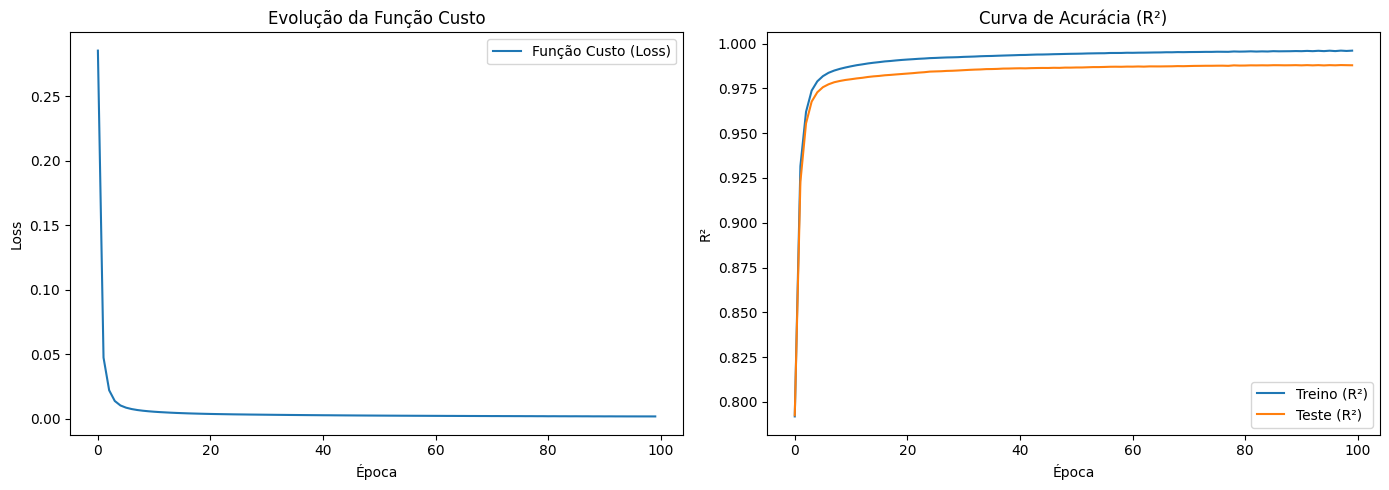

Não foi identificado overfitting significativo.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# ... (seu pré-processamento anterior)

# Parâmetros
max_epochs = 100
train_scores = []
test_scores = []
loss_curve = []

mlp = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=1,            # Treina 1 época por vez
    warm_start=True,       # Permite continuar o treinamento
    random_state=51,
    verbose=False
)

for epoch in range(max_epochs):
    mlp.fit(X_train_scaled, y_train)
    loss_curve.append(mlp.loss_)
    # Score de treino (R²)
    train_pred = mlp.predict(X_train_scaled)
    train_scores.append(r2_score(y_train, train_pred))
    # Score de teste (R²)
    test_pred = mlp.predict(X_test_scaled)
    test_scores.append(r2_score(y_test, test_pred))

# Plotando as curvas
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(loss_curve, label='Função Custo (Loss)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Evolução da Função Custo')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_scores, label='Treino (R²)')
plt.plot(test_scores, label='Teste (R²)')
plt.xlabel('Época')
plt.ylabel('R²')
plt.title('Curva de Acurácia (R²)')
plt.legend()

plt.tight_layout()
plt.show()

# Identificando início do overfitting
diff = np.array(train_scores) - np.array(test_scores)
epoca_overfit = np.argmax(diff > 0.05) if np.any(diff > 0.05) else None
if epoca_overfit:
    print(f"Possível início de overfitting na época: {epoca_overfit}")
else:
    print("Não foi identificado overfitting significativo.")

B)

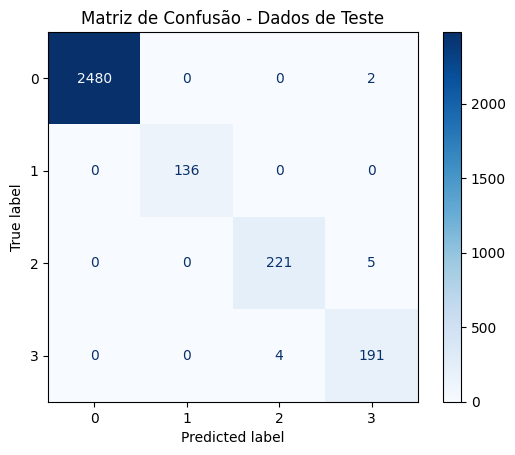

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (seu pré-processamento, divisão e normalização dos dados)

# Treine o classificador
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                        max_iter=100, random_state=51)
mlp_clf.fit(X_train_scaled, y_train)

# Faça predições nos dados de teste
y_test_pred = mlp_clf.predict(X_test_scaled)

# Gere e plote a matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Dados de Teste')
plt.show()